## CocaCla Prices Forecasting:

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [15]:
# Load CocaCola sales data
coca_cola_data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")


In [3]:
# Data Preprocessing for CocaCola Prices Forecasting
coca_cola_data[['Quarter', 'Year']] = coca_cola_data['Quarter'].str.split('_', expand=True)
coca_cola_data['Date'] = pd.to_datetime(coca_cola_data['Year'] + coca_cola_data['Quarter'].str[1:], format='%y%m')
coca_cola_data.set_index('Date', inplace=True)


In [4]:
# Split data into training and testing sets
train_coca_cola, test_coca_cola = train_test_split(coca_cola_data, test_size=0.2, shuffle=False)


In [16]:
arima_model = ARIMA(train_coca_cola['Sales'], order=(5,1,0))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.forecast(steps=len(test_coca_cola))
arima_rmse = np.sqrt(mean_squared_error(test_coca_cola['Sales'], arima_predictions))

In [17]:
sarima_model = SARIMAX(train_coca_cola['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
sarima_predictions = sarima_fit.forecast(steps=len(test_coca_cola))
sarima_rmse = np.sqrt(mean_squared_error(test_coca_cola['Sales'], sarima_predictions))

In [18]:
print("CocaCola Prices Forecasting:")
print("ARIMA RMSE:", arima_rmse)
print("SARIMA RMSE:", sarima_rmse)

CocaCola Prices Forecasting:
ARIMA RMSE: 749.7712198184233
SARIMA RMSE: 598.3124626979244


In [9]:
import matplotlib.pyplot as plt


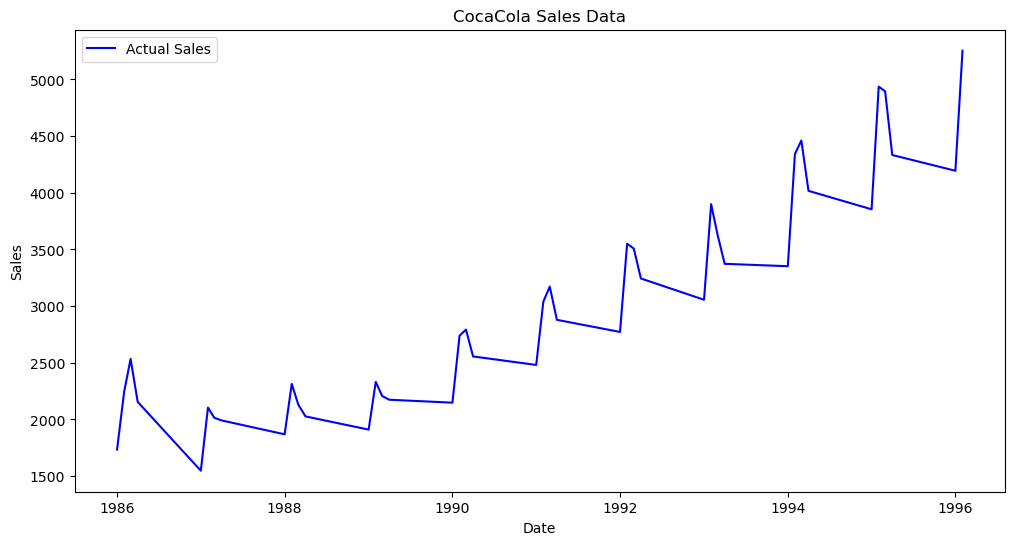

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(coca_cola_data.index, coca_cola_data['Sales'], label='Actual Sales', color='blue')
plt.title('CocaCola Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

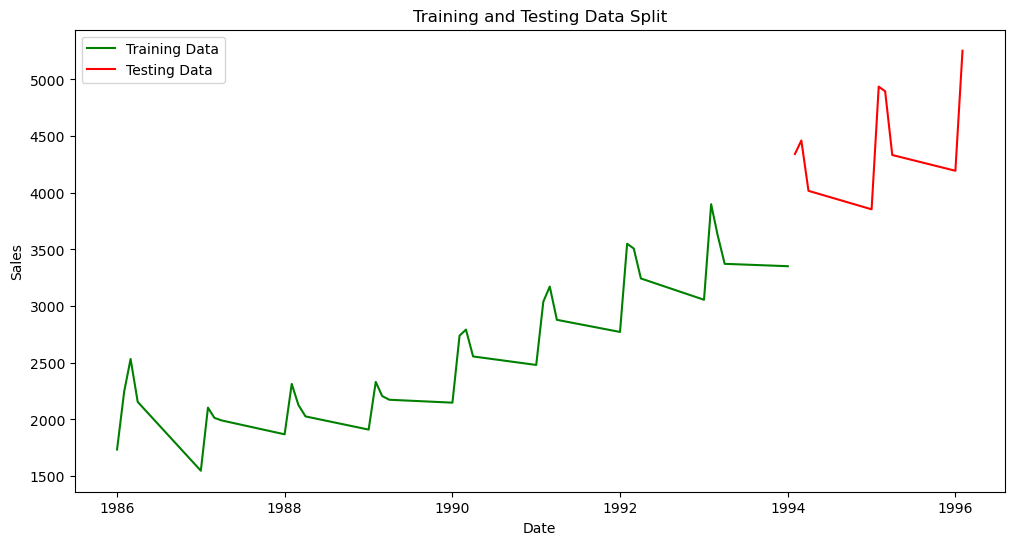

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(train_coca_cola.index, train_coca_cola['Sales'], label='Training Data', color='green')
plt.plot(test_coca_cola.index, test_coca_cola['Sales'], label='Testing Data', color='red')
plt.title('Training and Testing Data Split')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

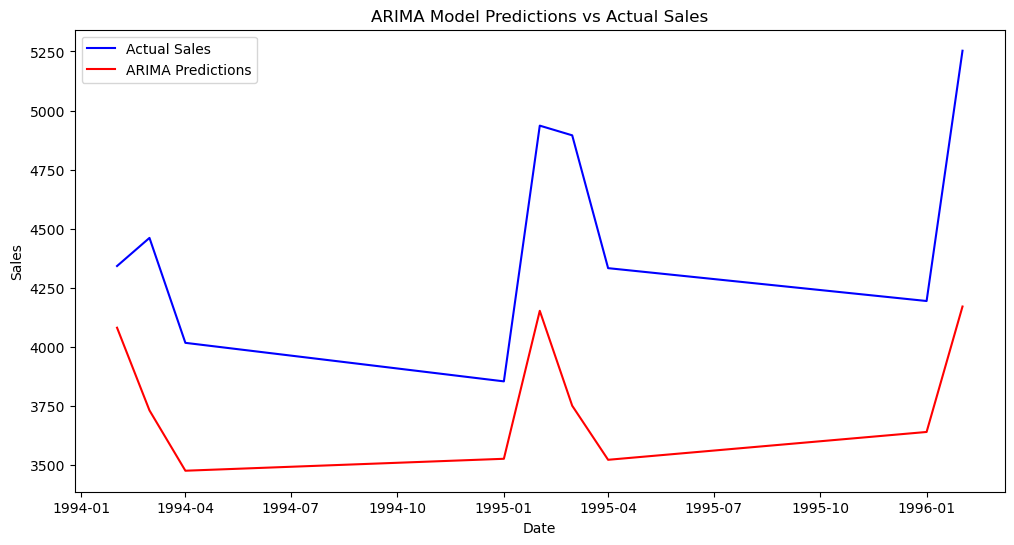

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(test_coca_cola.index, test_coca_cola['Sales'], label='Actual Sales', color='blue')
plt.plot(test_coca_cola.index, arima_predictions, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

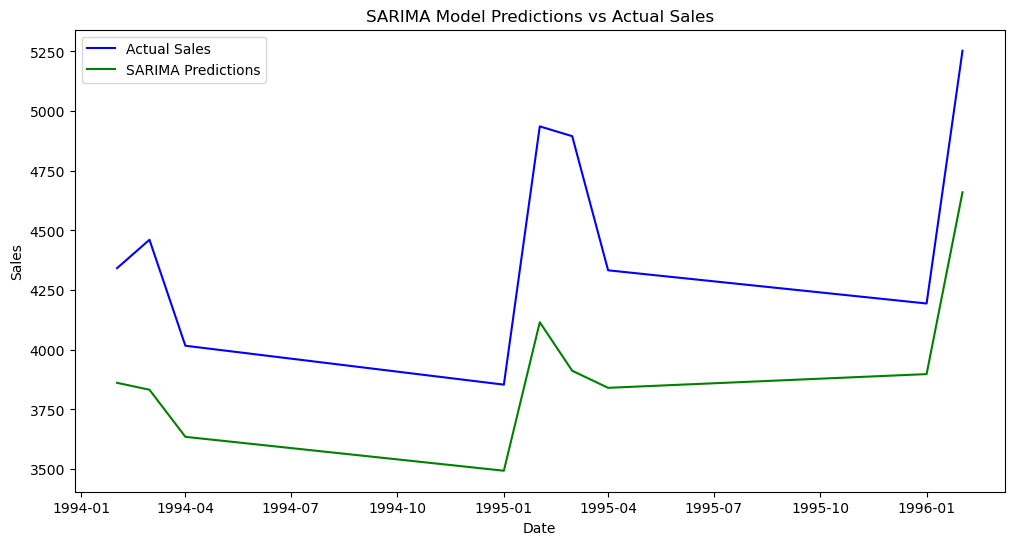

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(test_coca_cola.index, test_coca_cola['Sales'], label='Actual Sales', color='blue')
plt.plot(test_coca_cola.index, sarima_predictions, label='SARIMA Predictions', color='green')
plt.title('SARIMA Model Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


## Airlines Passengers Forecasting

In [20]:
airlines_data = pd.read_excel("Airlines+Data.xlsx")


In [21]:
airlines_data['Month'] = pd.to_datetime(airlines_data['Month'])
airlines_data.set_index('Month', inplace=True)

In [22]:
train_airlines, test_airlines = train_test_split(airlines_data, test_size=0.2, shuffle=False)


In [23]:
arima_model = ARIMA(train_airlines['Passengers'], order=(5,1,0))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.forecast(steps=len(test_airlines))
arima_rmse = np.sqrt(mean_squared_error(test_airlines['Passengers'], arima_predictions))

In [24]:
sarima_model = SARIMAX(train_airlines['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
sarima_predictions = sarima_fit.forecast(steps=len(test_airlines))
sarima_rmse = np.sqrt(mean_squared_error(test_airlines['Passengers'], sarima_predictions))


In [25]:
print("Airlines Passengers Forecasting:")
print("ARIMA RMSE:", arima_rmse)
print("SARIMA RMSE:", sarima_rmse)

Airlines Passengers Forecasting:
ARIMA RMSE: 77.19518358619933
SARIMA RMSE: 31.858593618057853


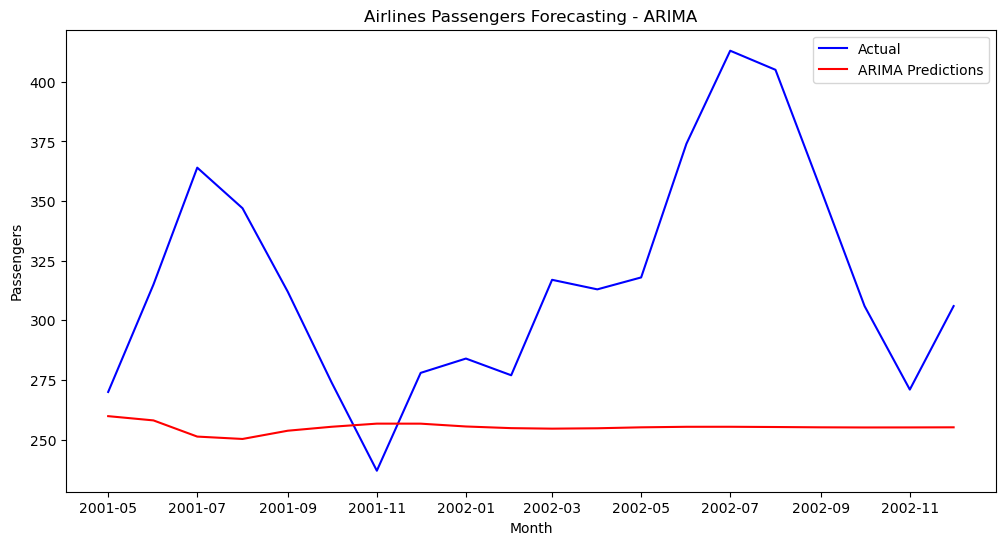

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(test_airlines.index, test_airlines['Passengers'], label='Actual', color='blue')
plt.plot(test_airlines.index, arima_predictions, label='ARIMA Predictions', color='red')
plt.title('Airlines Passengers Forecasting - ARIMA')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

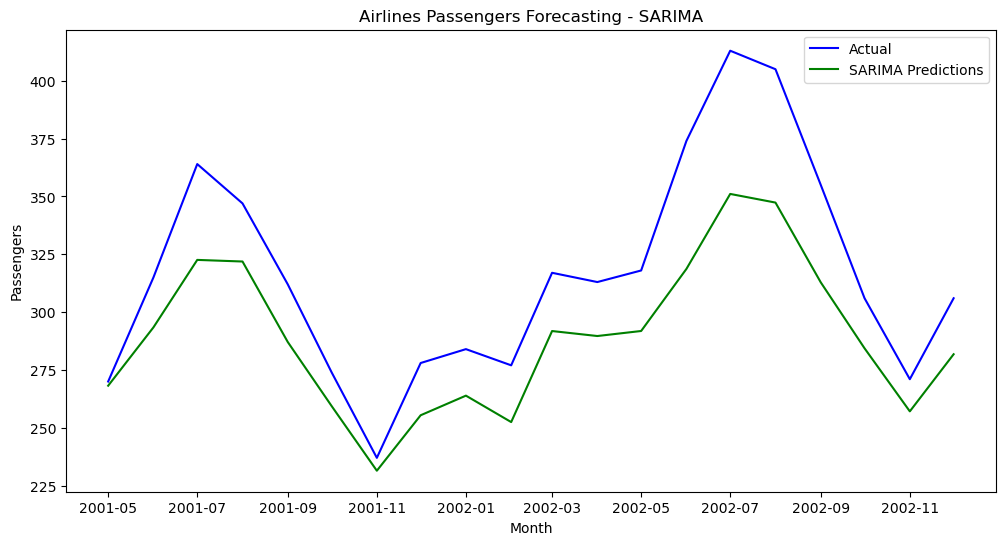

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(test_airlines.index, test_airlines['Passengers'], label='Actual', color='blue')
plt.plot(test_airlines.index, sarima_predictions, label='SARIMA Predictions', color='green')
plt.title('Airlines Passengers Forecasting - SARIMA')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()


#### The lower RMSE values indicate better performance. Therefore, we would choose the SARIMA model for both CocaCola Prices and Airlines Passengers forecasting. 
##### SARIMA outperforms ARIMA in terms of accuracy in both datasets.